In [101]:
from generatelib import *
from math import sin, cos, pi
import os
plt.style.use('seaborn-dark')
plt.rcParams['figure.figsize'] = [8,4]

# Generate Data
## Generate big random path samples

In [83]:
FILENAME = lambda sig, mu: f"RAN-{int(sig*100):05d}-{int(mu*100):04d}-NEW"
FILENAME(sig=0.2, mu=0)

'RAN-00020-0000-NEW'

In [84]:
FILENAME = None    # comment out to generate paths

In [85]:
if not FILENAME is None:
    print("Generating paths")
    for sig in (0.05, 0.1, 0.2, 0.5, 0.75, 1):
        df = PathGenerator(sig=sig).pathdf(1000)
        df.to_csv(FILENAME(sig=sig, mu=0)+".csv.gz", index=False, compression="gzip")
        #df.to_csv(FILENAME(sig=sig, mu=0)+".csv", index=False)
        df.to_pickle(FILENAME(sig=sig, mu=0)+".pickle")
else:
    print("Not generating paths")

Not generating paths


In [86]:
!ls *.pickle

RAN-005-00.pickle RAN-020-00.pickle RAN-075-00.pickle RAN-SIGMU.pickle
RAN-010-00.pickle RAN-050-00.pickle RAN-100-00.pickle


In [87]:
!ls *.csv.gz

zsh:1: no matches found: *.csv.gz


In [88]:
!ls *.csv

zsh:1: no matches found: *.csv


## Generate single random path repo

In [89]:
FILENAME2 = lambda mu: f"RAN-SIGMU"
FILENAME2 = None

In [90]:
dfs = {
    (sig,mu): PathGenerator(sig=sig, mu=mu).pathdf(10)
    for sig in (0.01, 0.05, 0.25, 0.5, 0.75, 1)
    for mu in [0,0.05,0.2]
}
df_aggr = pd.concat(dfs.values(), axis=1)
#df.to_csv(FILENAME(sig=sig, mu=0)+".csv.gz", index=False, compression="gzip")
#df.to_csv(FILENAME(sig=sig, mu=0)+".csv", index=False)
if not FILENAME2 is None:
    df_aggr.to_pickle(FILENAME2(mu=int(mu*100))+".pickle")
#df_aggr

In [91]:
!ls

Display.ipynb     RAN-005-00.pickle RAN-075-00.pickle charts
Display.py        RAN-010-00.pickle RAN-100-00.pickle download
Generate.ipynb    RAN-020-00.pickle RAN-SIGMU.pickle  fls.py
Generate.py       RAN-050-00.pickle __pycache__       generatelib.py


In [92]:
#!rm RAN-AGGR.pickle

In [93]:
# fns = [fn for fn in os.listdir() if fn[:3]=="RAN"]
# fns = ['RAN-005-00.pickle',
#  'RAN-010-00.pickle',
#  'RAN-100-00.pickle',
#  'RAN-075-00.pickle',
#  'RAN-020-00.pickle',
#  'RAN-050-00.pickle']
# # for fn in fns:
# #     df = pd.read_pickle(fn)
# #     del df["time"]
# #     df = df.set_index("datetime")
# #     df.to_pickle(fn)
# pd.read_pickle(fns[2])

## Generate Sin, Cos paths

In [102]:
PathGenerator.DEFAULTS

{'mu': 0,
 'sig': 0.5,
 's0': 100,
 'time': 1,
 'N': 200,
 'startdt': (2020, 1, 1),
 'numpaths': 100,
 'colname': 'p{sig100:03d}-{mu100:02d}-{ix:03d}'}

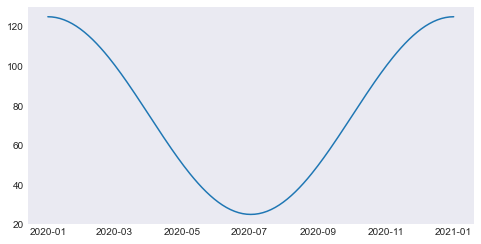

In [158]:
start_dt=pd.Timestamp("2020-01-01")
end_dt=pd.Timestamp("2021-01-01")
nsteps = 200
delt = (end_dt-start_dt)/nsteps
x = lambda n: 2*pi*n/nsteps
t = lambda n: start_dt + delt*n
p = lambda i, f: 75+50*cos((f+1)*x(i))
assert x(nsteps) == 2*pi
assert t(nsteps) == end_dt


ix = 10
time = np.array([t(i) for i in range(nsteps+1)])

dfs = [
    pd.DataFrame(
        np.array([p(i,ix) for i in range(nsteps+1)]), 
        index=time, 
        columns=[f"p-a-{ix:02d}"]
    )
for ix in range(10)
]
df_aggr = pd.concat(dfs, axis=1)
df_aggr.to_pickle("COS.pickle")
plt.plot(dfs[0])

In [144]:
p(100,5)

25.0

In [157]:
!ls

Display.ipynb     RAN-005-00.pickle RAN-075-00.pickle charts
Display.py        RAN-010-00.pickle RAN-100-00.pickle download
Generate.ipynb    RAN-020-00.pickle RAN-SIGMU.pickle  fls.py
Generate.py       RAN-050-00.pickle __pycache__       generatelib.py


## Data retrieval examples

In [163]:
fn = "COS.pickle"

In [164]:
pdcols(fn)

Index(['p-a-00', 'p-a-01', 'p-a-02', 'p-a-03', 'p-a-04', 'p-a-05', 'p-a-06',
       'p-a-07', 'p-a-08', 'p-a-09'],
      dtype='object')

In [165]:
ser=pdread(fn, "p-a-01")
ser

2020-01-01 00:00:00    125.000000
2020-01-02 19:55:12    124.901336
2020-01-04 15:50:24    124.605735
2020-01-06 11:45:36    124.114363
2020-01-08 07:40:48    123.429158
                          ...    
2020-12-24 16:19:12    123.429158
2020-12-26 12:14:24    124.114363
2020-12-28 08:09:36    124.605735
2020-12-30 04:04:48    124.901336
2021-01-01 00:00:00    125.000000
Name: p-a-01, Length: 201, dtype: float64

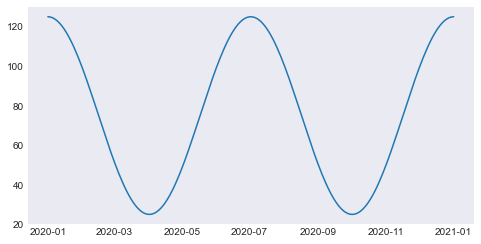

In [166]:
plt.plot(ser)

In [97]:
ser = pdread(fn, 0)
ser

datetime
2020-01-01 00:00:00    100.000000
2020-01-02 19:49:48     99.885425
2020-01-04 15:39:36     99.834626
2020-01-06 11:29:24     99.798634
2020-01-08 07:19:12     99.866637
                          ...    
2020-12-23 22:40:48    101.513945
2020-12-25 18:30:36    101.440115
2020-12-27 14:20:24    101.335794
2020-12-29 10:10:12    101.319060
2020-12-31 06:00:00    101.306867
Name: p001-00-000, Length: 201, dtype: float64

In [98]:
ser.index[0]

Timestamp('2020-01-01 00:00:00')

In [99]:
pd.Timedelta(days=1)

Timedelta('1 days 00:00:00')